In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#Load the dataset
df = pd.read_csv('forex_predictions_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [13]:
#inspection of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


In [14]:
df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [15]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

In [16]:
df.shape

(229, 10)

In [17]:
#Handling bad data forexample empty cells/values, wrong data, duplicates, wrong formats and outliers
df.isnull().sum()

Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [22]:
#For numerical columns, we can fill missing values with the mode or median but not mean due to outliers
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        #Convert to numeric, coercing errors to NaN
        df[col]=df[col].fillna(df[col].median()) 
        
#since there is only one categorical column "Signal"
df['Signal'] = df['Signal'].fillna(df['Signal'].mode)

In [24]:
print("Missing values after handling:")
df.isnull().sum()

Missing values after handling:


Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64

In [ ]:
#Data in wrong format
#Convert Date column to datetime format
df['Date']= pd.to_datetime(df['Date'], errors='coerce')
#Handle volume column with error values
#Since we have already dealt with numerical columns, i am not going to repeat


np.int64(10)

In [26]:
#Dealing with outliers in numeric cols
for col in numeric_cols:
    if col in df.columns:
        std_dev = df[col].std()
        mean = df[col].mean()
        df[col] = df[col].apply(lambda x:x if(mean -3*std_dev < x < mean+3*std_dev)else np.nan)

print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


In [27]:
"""checking for duplicates"""
df.duplicated().sum()

np.int64(10)

In [28]:
df = df.drop_duplicates()

In [30]:
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 219


In [35]:
#Dealing with duplicate date rows
df = df.drop_duplicates(subset= 'Date')
print("Numbeer of rows with duplicate dates:", df.shape[0])

Numbeer of rows with duplicate dates: 217


In [36]:
df.shape

(217, 10)

In [37]:
df.isnull().sum()

Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

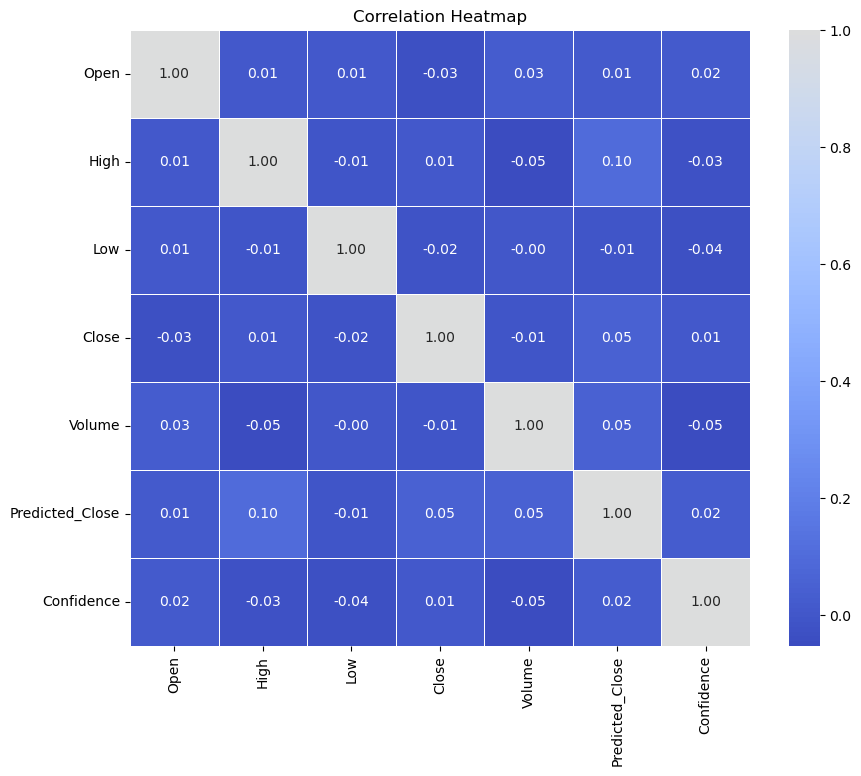

In [39]:
# Analysis
# Correlation Analysis
# Calculate correlation matrix
corr_matrix = df[['Open','High','Low','Close','Volume','Predicted_Close','Confidence']].corr()
#plot the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')


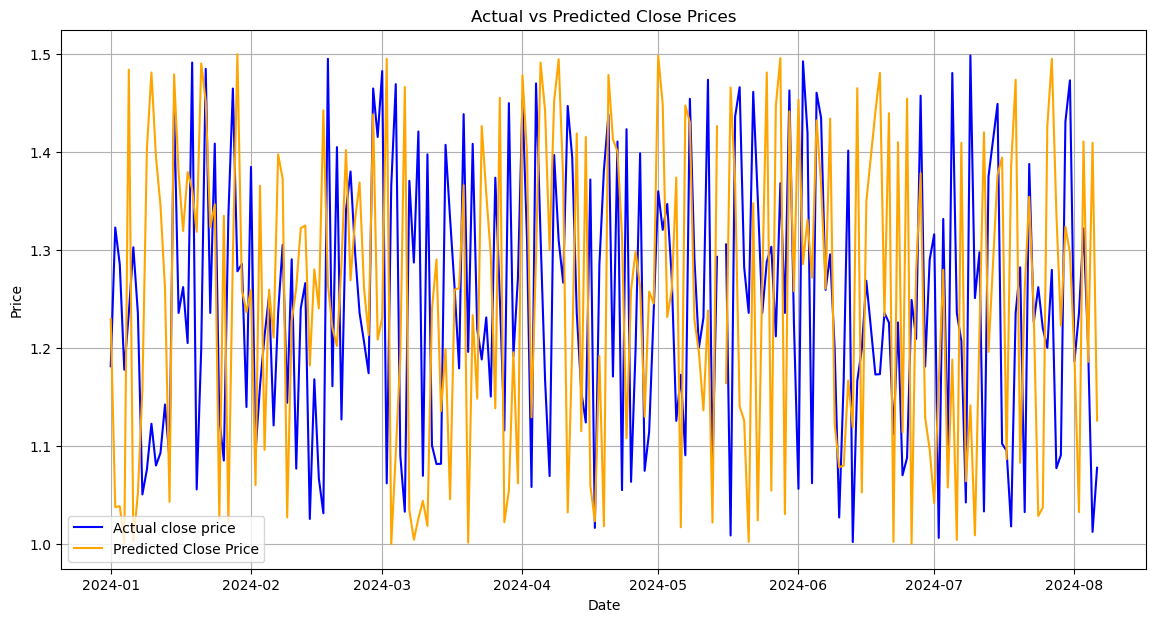

In [41]:
#Actual vs predicted Close prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'],df['Close'], label='Actual close price', color='blue')
plt.plot(df['Date'], df['Predicted_Close'],label='Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Signal Type')

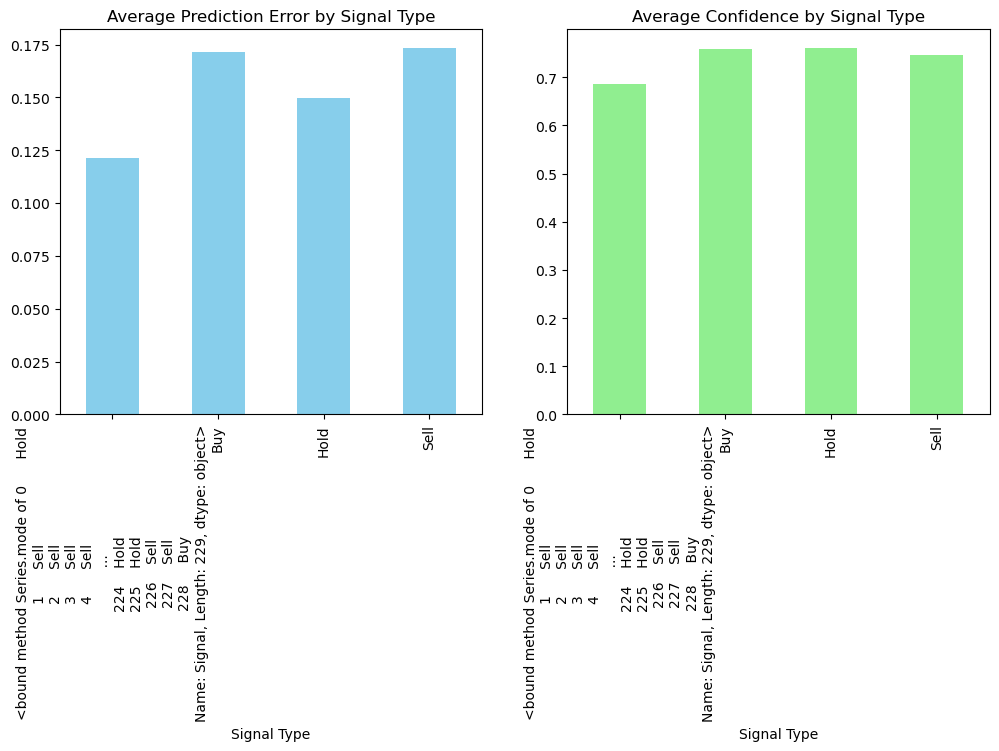

In [44]:

# Signal Performance Analysis
#here we are calculating prediction error got from the absolute value of the difference between the closing price and predicted price
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type whether buying, sell or hold
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()
# Plotting the average prediction error by signal type
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar', color='skyblue')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')

# Plotting the average confidence by signal type
plt.subplot(1, 2, 2)
signal_confidence.plot(kind='bar', color='lightgreen')
plt.title('Average Confidence by Signal Type')
plt.xlabel('Signal Type')

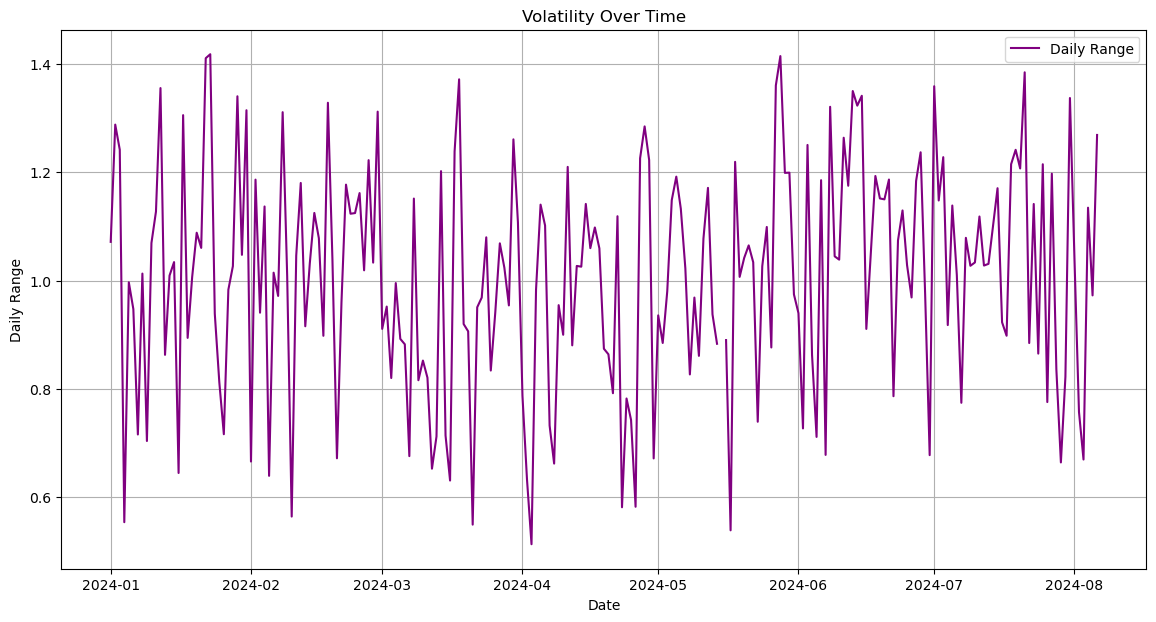

In [45]:

# Volitility Analysis
# Calculate daily returns
df['Daily_Range'] = df['High']-df['Low']
# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily_Range'], label='Daily Range', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatility Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between the price columns, particularly between 'Open', 'High', 'Low', and 'Close'.
# 3. The actual vs predicted close prices plot indicates that the model performs reasonably well, but there are some discrepancies.
# 4. The signal performance analysis shows that the average prediction error varies by signal type, with 'Buy' signals generally having lower errors.
# 5. The volatility analysis indicates fluctuations in the daily range, which can be useful for understanding market behavior.
# 6. The cleaned and processed data is ready for further analysis or modeling.
# Save the cleaned and processed data for future use


# Price correlation analysis

# Recemmendations for future work
# 1. Model Improvement: Explore more advanced machine learning models or deep learning techniques to improve prediction accuracy.
# 2. Feature Engineering: Create additional features that may capture market dynamics better, such as technical indicators (e.g., moving averages, RSI).
# 3. Time Series Analysis: Implement time series analysis techniques to capture trends and seasonality in the data.
# 4. Backtesting: Implement a backtesting framework to evaluate the performance of trading strategies based on the predictions.
# 5. Real-time Data Integration: Consider integrating real-time data feeds to make predictions on live market conditions.
# 6. Model Deployment: Explore options for deploying the model in a production environment for real-time predictions.